In [3]:
library(Seurat)
library(tidyverse)
library(argparse)
library(ggplot2)
library(stringr)
library(dplyr)
library(ggsci)

In [ ]:
TCR富集分析路径
/SGRNJ06/randd/PROJECT/other/cellranger_vdj/20230316_PBMC_TB/TCR/M_0727PBMC1_NMc2_T3Nlib
/SGRNJ06/randd/PROJECT/other/cellranger_vdj/20230316_PBMC_TB/TCR/M_0727PBMC2_NMc2_T3Nlib
BCR富集分析路径
/SGRNJ06/randd/PROJECT/other/cellranger_vdj/20230316_PBMC_TB/BCR/M_0727PBMC1_B3Nlib
/SGRNJ06/randd/PROJECT/other/cellranger_vdj/20230316_PBMC_TB/BCR/M_0727PBMC2_B3Nlib

In [57]:
rds = readRDS("/SGRNJ06/randd/display/longVDJ/M_PBMC/20221009_TB/m_PBMC_nodoublet_PRO_new.rds")

In [58]:
Idents(rds) <- "sample"
rna <- subset(rds,idents = c("PBMC1"))

In [59]:
vdj <- read.table("/SGRNJ06/randd/PROJECT/other/cellranger_vdj/20230316_PBMC_TB/TCR/M_0727PBMC1_NMc2_T3Nlib/05.match/matched_contig_annotations.csv", sep=',', header=T)

In [60]:
head(rds@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,reportname,platform,percent.mt,cluster,raw_cluster,louvain,seurat_cluster,cell_name
,<fct>,<dbl>,<int>,<chr>,<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>
M_0727PBMC1_Nlib_AAACATCGAAACATCGACATTGGC,M,2491,1083,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,2.2079487,NaiveB,11,11,11,M_0727PBMC1_Nlib_AAACATCGAAACATCGACATTGGC
M_0727PBMC1_Nlib_AAACATCGAAACATCGATAGCGAC,M,3047,1482,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,0.8861175,MPs,7,7,7,M_0727PBMC1_Nlib_AAACATCGAAACATCGATAGCGAC
M_0727PBMC1_Nlib_AAACATCGAAACATCGCACTTCGA,M,1672,906,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,3.2894738,NaiveT,10,10,10,M_0727PBMC1_Nlib_AAACATCGAAACATCGCACTTCGA
M_0727PBMC1_Nlib_AAACATCGAAACATCGGATGAATC,M,1609,796,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,2.2374146,ProB,8,8,8,M_0727PBMC1_Nlib_AAACATCGAAACATCGGATGAATC
M_0727PBMC1_Nlib_AAACATCGAAACATCGGGAGAACA,M,1640,925,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,4.3902440,NaiveB,1,1,1,M_0727PBMC1_Nlib_AAACATCGAAACATCGGGAGAACA
M_0727PBMC1_Nlib_AAACATCGAACAACCACCATCCTC,M,2509,1330,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,0.6377043,MPs,6,6,6,M_0727PBMC1_Nlib_AAACATCGAACAACCACCATCCTC


In [61]:
df <- rna@meta.data
df$barcode <- rownames(df)

if (grepl("_", rownames(df)[1])){
  vdj$shi<-paste("M_0727PBMC1_Nlib","_",sep="")
  vdj$barcode<-str_c(vdj$shi,vdj$barcode)
}

In [62]:
cells <- subset(vdj, productive=='True')

cells1 <- subset(vdj, raw_clonotype_id=='clonotype1')
cells2 <- subset(vdj, raw_clonotype_id=='clonotype3')
cells3 <- subset(vdj, raw_clonotype_id=='clonotype5')
cells4 <- subset(vdj, raw_clonotype_id=='clonotype6')
cells5 <- subset(vdj, raw_clonotype_id=='clonotype7')
cells6 <- subset(vdj, raw_clonotype_id=='clonotype8')
cells7 <- subset(vdj, raw_clonotype_id=='clonotype9')
cells8 <- subset(vdj, raw_clonotype_id=='clonotype10')
cells9 <- subset(vdj, raw_clonotype_id=='clonotype15')
cells10 <- subset(vdj, raw_clonotype_id=='clonotype16')

barcodes1 <- unique(cells1$barcode)
barcodes2 <- unique(cells2$barcode)
barcodes3 <- unique(cells3$barcode)
barcodes4 <- unique(cells4$barcode)
barcodes5 <- unique(cells5$barcode)
barcodes6 <- unique(cells6$barcode)
barcodes7 <- unique(cells7$barcode)
barcodes8 <- unique(cells8$barcode)
barcodes9 <- unique(cells9$barcode)
barcodes10 <- unique(cells10$barcode)

In [73]:
meta = rna@meta.data
meta$Class = 'NA'
meta$barcode = rownames(meta)

meta$Class[meta$barcode %in% barcodes1] <- "CATDYQGGRALIF_CASSDLQGAAEQFF"
meta$Class[meta$barcode %in% barcodes2] <- "CAACMSNYNVLYF_CASSTWGGAQDTQYF"
meta$Class[meta$barcode %in% barcodes3] <- "CALEPDTNTGKLTF_CASRQSYNSPLYF"
meta$Class[meta$barcode %in% barcodes4] <- "CAIVSGSWQLIF_CASSLQGPNTEVFF"
meta$Class[meta$barcode %in% barcodes5] <- "CALRNTNTGKLTF_CASGDGPGTTSAETLYF"
meta$Class[meta$barcode %in% barcodes6] <- "CAVSQRNNNNAPRF_CASSPRTGYAEQFF"
meta$Class[meta$barcode %in% barcodes7] <- "CAASGFYGNEKITF_CASSWRGNSDYTF"
meta$Class[meta$barcode %in% barcodes8] <- "CAVRSSGSWQLIF_CASSPDRGEQYF"
meta$Class[meta$barcode %in% barcodes9] <- "CAAETASSGSWQLIF_CASSFRQGAGYAEQFF"
meta$Class[meta$barcode %in% barcodes10] <- "CAASASSGSWQLIF_CANEQYF"

In [74]:
meta = dplyr::select(meta, -c("barcode"))
meta <- meta %>% drop_na(nCount_RNA)
table(meta$Class)
rna@meta.data = meta
#rna <- RunUMAP(rna, dims = 1:20)


   CAACMSNYNVLYF_CASSTWGGAQDTQYF CAAETASSGSWQLIF_CASSFRQGAGYAEQFF 
                               9                                4 
          CAASASSGSWQLIF_CANEQYF     CAASGFYGNEKITF_CASSWRGNSDYTF 
                               4                                9 
     CAIVSGSWQLIF_CASSLQGPNTEVFF     CALEPDTNTGKLTF_CASRQSYNSPLYF 
                               9                               10 
 CALRNTNTGKLTF_CASGDGPGTTSAETLYF     CATDYQGGRALIF_CASSDLQGAAEQFF 
                               8                               39 
      CAVRSSGSWQLIF_CASSPDRGEQYF    CAVSQRNNNNAPRF_CASSPRTGYAEQFF 
                               7                                7 
                              NA 
                           23140 

In [75]:
meta

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,reportname,platform,percent.mt,cluster,raw_cluster,louvain,seurat_cluster,cell_name,Class
,<fct>,<dbl>,<int>,<chr>,<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>
M_0727PBMC1_Nlib_AAACATCGAAACATCGACATTGGC,M,2491,1083,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,2.2079487,NaiveB,11,11,11,M_0727PBMC1_Nlib_AAACATCGAAACATCGACATTGGC,NA
M_0727PBMC1_Nlib_AAACATCGAAACATCGATAGCGAC,M,3047,1482,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,0.8861175,MPs,7,7,7,M_0727PBMC1_Nlib_AAACATCGAAACATCGATAGCGAC,NA
M_0727PBMC1_Nlib_AAACATCGAAACATCGCACTTCGA,M,1672,906,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,3.2894738,NaiveT,10,10,10,M_0727PBMC1_Nlib_AAACATCGAAACATCGCACTTCGA,NA
M_0727PBMC1_Nlib_AAACATCGAAACATCGGATGAATC,M,1609,796,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,2.2374146,ProB,8,8,8,M_0727PBMC1_Nlib_AAACATCGAAACATCGGATGAATC,NA
M_0727PBMC1_Nlib_AAACATCGAAACATCGGGAGAACA,M,1640,925,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,4.3902440,NaiveB,1,1,1,M_0727PBMC1_Nlib_AAACATCGAAACATCGGGAGAACA,NA
M_0727PBMC1_Nlib_AAACATCGAACAACCACCATCCTC,M,2509,1330,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,0.6377043,MPs,6,6,6,M_0727PBMC1_Nlib_AAACATCGAACAACCACCATCCTC,NA
M_0727PBMC1_Nlib_AAACATCGAACAACCACCGTGAGA,M,597,394,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,1.1725293,NaiveT,4,4,4,M_0727PBMC1_Nlib_AAACATCGAACAACCACCGTGAGA,NA
M_0727PBMC1_Nlib_AAACATCGAACAACCATCTTCACA,M,3717,1628,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,1.8832392,Platelets,14,14,14,M_0727PBMC1_Nlib_AAACATCGAACAACCATCTTCACA,NA
M_0727PBMC1_Nlib_AAACATCGAACCGAGAAAACATCG,M,1976,997,PBMC1,M_0727PBMC1_Nlib,M_0727PBMC1_Nlib,A,2.0748987,NaiveB,11,11,11,M_0727PBMC1_Nlib_AAACATCGAACCGAGAAAACATCG,NA


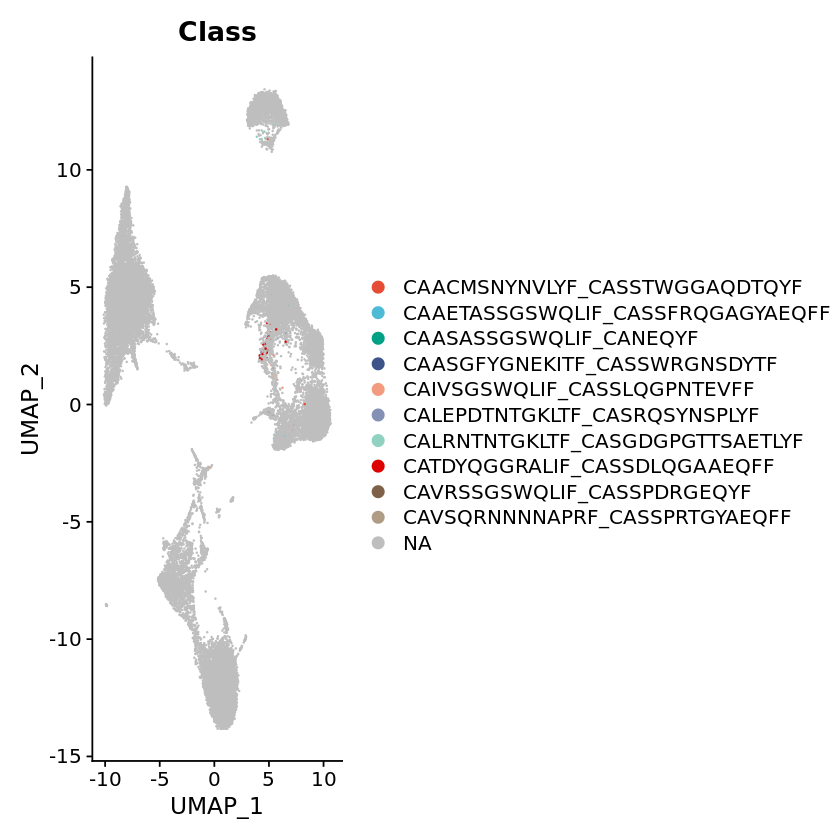

In [78]:
#  "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF" "#91D1C2FF" "#DC0000FF" "#7E6148FF" "#B09C85FF"
UMAPPlot(rna,group.by='Class',label=FALSE,
         cols=c("#E64B35FF","#4DBBD5FF","#00A087FF","#3C5488FF","#F39B7FFF","#8491B4FF","#91D1C2FF","#DC0000FF","#7E6148FF","#B09C85FF","grey"))

In [79]:
outP = stringr::str_glue("/SGRNJ06/randd/USER/cjj/celedev/vdj10x/20231013top10cl_umap/clonotype_umap.png")
png(outP, height=1000, width=1200)
UMAPPlot(rna,group.by='Class',label=FALSE,
         cols=c("#E64B35FF","#4DBBD5FF","#00A087FF","#3C5488FF","#F39B7FFF","#8491B4FF","#91D1C2FF","#DC0000FF","#7E6148FF","#B09C85FF","grey"))
dev.off()

png 
  2

In [77]:
?scale_color_npg

scale_color_npg {ggsci},R Documentation
palette,"Palette type. Currently there is one available option: ""nrc"" (10-color palette inspired by Nature Reviews Cancer)."
alpha,"Transparency level, a real number in (0, 1]. See alpha in rgb for details."
...,additional parameters for discrete_scale
